<a href="https://colab.research.google.com/github/PiotrSkoupy/Twitter_Analysis/blob/main/ZUM2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import tweepy

##Getting tweets

In [ ]:
# df = pd.read_csv('/content/pl_covid_tweets_clean.txt', sep='\t')
# df.head()

,tweet_id,date,time,lang,country_place
0,1219370546116407297,2020-01-20,21:26:07,pl,NaN
1,1220355028961103872,2020-01-23,14:38:06,pl,NaN
2,1221099475982323712,2020-01-25,15:56:16,pl,NaN
3,1221232003393167360,2020-01-26,00:42:53,pl,NaN
4,1221344960194195457,2020-01-26,08:11:44,pl,NaN


In [ ]:
id_list = df['tweet_id'].tolist()

In [ ]:
print(len(id_list))

583805


In [ ]:
# CONSUMER_KEY = "*"
# CONSUMER_SECRET = "*"
# OAUTH_TOKEN = "*"
# OAUTH_TOKEN_SECRET = "*"
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
# api = tweepy.API(auth)

In [ ]:
# chunked_list = list()
# chunk_size=100
# for i in range(0,len(id_list), chunk_size):
#   chunked_list.append(id_list[i:i+chunk_size])
# print(len(chunked_list))

5839


In [ ]:
import time
from tqdm import tqdm

In [ ]:
# tweets_list =[]
# for chunk in tqdm(chunked_list):
#   while True:
#     try:
#       r = api.statuses_lookup(chunk)
#       break
#     except:
#       time.sleep(1) 
#   for tweet in r:
#     tweets_list.append(tweet.text)

100%|██████████| 5839/5839 [1:34:28<00:00,  1.03it/s]


In [ ]:
# df = pd.DataFrame({
#                    'tweet':tweets_list})
# df.to_csv('zum_tweets.csv', index=False)
# df.to_excel('zum_tweets.xlsx', index=False)

In [ ]:
# df.head()

,tweet
0,"Kiedy #coronavirus dotrze do Polski, napotka o..."
1,Kolejni Polacy chcą wrócić z Wuhan https://t.c...
2,A tymczasem w Wuhan odcięto od reszty świata o...
3,@PatrykWachowiec @KancelariaSejmu nie zdziwię ...
4,".@MSZ_RP: 19 Polaków chce wrócić z Wuhan, w am..."


##Cleaning data

Removing stopwords

In [71]:
df = pd.read_csv('/content/zum_tweets.csv')

In [30]:
#Get stopwords
%%capture
!wget https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt

In [31]:
stop =[]
with open("/content/polish.stopwords.txt", "r") as a_file:
  for line in a_file:
    stopword = line.strip()
    stop.append(stopword)

In [32]:
df["tweet"] = df["tweet"].str.lower()
df['tweet_without_stopwords'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [33]:
df.head()

,tweet,tweet_without_stopwords
0,"kiedy #coronavirus dotrze do polski, napotka o...","#coronavirus dotrze polski, napotka opór znako..."
1,kolejni polacy chcą wrócić z wuhan https://t.c...,kolejni polacy chcą wrócić wuhan https://t.co/...
2,a tymczasem w wuhan odcięto od reszty świata o...,tymczasem wuhan odcięto reszty świata obszar p...
3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"@patrykwachowiec @kancelariasejmu zdziwię się,..."
4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...",".@msz_rp: 19 polaków chce wrócić wuhan, ambasa..."


In [34]:
df['clean_tweet']=''
df.head()

,tweet,tweet_without_stopwords,clean_tweet
0,"kiedy #coronavirus dotrze do polski, napotka o...","#coronavirus dotrze polski, napotka opór znako...",
1,kolejni polacy chcą wrócić z wuhan https://t.c...,kolejni polacy chcą wrócić wuhan https://t.co/...,
2,a tymczasem w wuhan odcięto od reszty świata o...,tymczasem wuhan odcięto reszty świata obszar p...,
3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"@patrykwachowiec @kancelariasejmu zdziwię się,...",
4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...",".@msz_rp: 19 polaków chce wrócić wuhan, ambasa...",


In [35]:
#Removing link
df['clean_tweet'] = df['tweet_without_stopwords'].str.replace(r'http\S+', '')

In [36]:
#Removing mails and tagged people
df['clean_tweet'] = df['clean_tweet'].str.replace(r'@\S+', '')

In [37]:
#Removing punctuation
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^\w\s]', '')

In [38]:
#Removing numericals
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[0-9]+', '')

In [39]:
df.head()

,tweet,tweet_without_stopwords,clean_tweet
0,"kiedy #coronavirus dotrze do polski, napotka o...","#coronavirus dotrze polski, napotka opór znako...",coronavirus dotrze polski napotka opór znakomi...
1,kolejni polacy chcą wrócić z wuhan https://t.c...,kolejni polacy chcą wrócić wuhan https://t.co/...,kolejni polacy chcą wrócić wuhan
2,a tymczasem w wuhan odcięto od reszty świata o...,tymczasem wuhan odcięto reszty świata obszar p...,tymczasem wuhan odcięto reszty świata obszar p...
3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"@patrykwachowiec @kancelariasejmu zdziwię się,...",zdziwię się powiedzą listy pojechały chin wu...
4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...",".@msz_rp: 19 polaków chce wrócić wuhan, ambasa...",polaków chce wrócić wuhan ambasadzie rp peki...


In [42]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [43]:
# #Removing emojis
for index, row in df.iterrows():
  tweet = row[2]
  tweet = emoji_pattern.sub(r'', tweet)
  df.at[index , 'clean_tweet'] = tweet
  

In [44]:
#Remove repeating words
df['clean_tweet'] = df['clean_tweet'].str.replace(r'(.)1+', r'1')

In [45]:
df.head()

,tweet,tweet_without_stopwords,clean_tweet
0,"kiedy #coronavirus dotrze do polski, napotka o...","#coronavirus dotrze polski, napotka opór znako...",coronavirus dotrze polski napotka opór znakomi...
1,kolejni polacy chcą wrócić z wuhan https://t.c...,kolejni polacy chcą wrócić wuhan https://t.co/...,kolejni polacy chcą wrócić wuhan
2,a tymczasem w wuhan odcięto od reszty świata o...,tymczasem wuhan odcięto reszty świata obszar p...,tymczasem wuhan odcięto reszty świata obszar p...
3,@patrykwachowiec @kancelariasejmu nie zdziwię ...,"@patrykwachowiec @kancelariasejmu zdziwię się,...",zdziwię się powiedzą listy pojechały chin wu...
4,".@msz_rp: 19 polaków chce wrócić z wuhan, w am...",".@msz_rp: 19 polaków chce wrócić wuhan, ambasa...",polaków chce wrócić wuhan ambasadzie rp peki...


In [46]:
final = df['clean_tweet']
final.to_excel('clean_frame.xlsx',index=False)

## Word embedding

In [48]:
import pandas as pd
final = pd.read_excel('/content/clean_frame.xlsx')

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(final['clean_tweet'])

##KMeans

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_cv)
final['cluster'] = kmeans.predict(X_cv)

In [51]:
final['Sentiment']=''
final.loc[final['cluster'] == 0 , 'Sentiment'] = 'Negative'
final.loc[final['cluster'] == 1 , 'Sentiment'] = 'positive'
final.head()

,clean_tweet,cluster,Sentiment
0,coronavirus dotrze polski napotka opór znakomi...,1,positive
1,kolejni polacy chcą wrócić wuhan,1,positive
2,tymczasem wuhan odcięto reszty świata obszar p...,1,positive
3,zdziwię się powiedzą listy pojechały chin wu...,1,positive
4,polaków chce wrócić wuhan ambasadzie rp peki...,1,positive


In [52]:
final.to_excel('clustered_data.xlsx',index=False)

##Machine learning

In [53]:
final = pd.read_excel('/content/clustered_data.xlsx')
final.head()

,clean_tweet,cluster,Sentiment
0,coronavirus dotrze polski napotka opór znakomi...,1,positive
1,kolejni polacy chcą wrócić wuhan,1,positive
2,tymczasem wuhan odcięto reszty świata obszar p...,1,positive
3,zdziwię się powiedzą listy pojechały chin wu...,1,positive
4,polaków chce wrócić wuhan ambasadzie rp peki...,1,positive


In [54]:
# tokenizacja
from nltk.tokenize import SpaceTokenizer
space_tokenizer = SpaceTokenizer()
final['clean_tweet'] = final['clean_tweet'].apply(space_tokenizer.tokenize)
final.head()

,clean_tweet,cluster,Sentiment
0,"[coronavirus, dotrze, polski, napotka, opór, z...",1,positive
1,"[kolejni, polacy, chcą, wrócić, wuhan, ]",1,positive
2,"[tymczasem, wuhan, odcięto, reszty, świata, ob...",1,positive
3,"[, , zdziwię, się, powiedzą, listy, pojechały,...",1,positive
4,"[, , polaków, chce, wrócić, wuhan, ambasadzie,...",1,positive


In [55]:
from nltk.stem import *
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
final['clean_tweet']= final['clean_tweet'].apply(lambda x: stemming_on_text(x))
final.head()

,clean_tweet,cluster,Sentiment
0,"[coronavirus, dotrze, polski, napotka, opór, z...",1,positive
1,"[kolejni, polacy, chcą, wrócić, wuhan, ]",1,positive
2,"[tymczasem, wuhan, odcięto, reszty, świata, ob...",1,positive
3,"[, , zdziwię, się, powiedzą, listy, pojechały,...",1,positive
4,"[, , polaków, chce, wrócić, wuhan, ambasadzie,...",1,positive


In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
final['clean_tweet']= final['clean_tweet'].apply(lambda x: lemmatizer_on_text(x))
final.head()

,clean_tweet,cluster,Sentiment
0,"[coronavirus, dotrze, polski, napotka, opór, z...",1,positive
1,"[kolejni, polacy, chcą, wrócić, wuhan, ]",1,positive
2,"[tymczasem, wuhan, odcięto, reszty, świata, ob...",1,positive
3,"[, , zdziwię, się, powiedzą, listy, pojechały,...",1,positive
4,"[, , polaków, chce, wrócić, wuhan, ambasadzie,...",1,positive


In [58]:
final.to_excel('ML_ready.xlsx', index=False)

Splitting data into training, testing and validation set

In [98]:
X=final.clean_tweet
y=final.cluster

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state =42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state =42)

TF-IDF vectorizer

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
X_train = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  100000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [101]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
X_test = vectorizer.fit_transform(X_test.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  100000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def model_Evaluate(model):
  # Predykcja danych na danych testowych
  y_pred = model.predict(X_test)

  # Wyświetlenie metryk ewaluacji na podstawie predykcji i ground truth (faktycznych etykiet)
  print(classification_report(y_test, y_pred))

  # Obliczamy i wyświetlamy confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#Naive Bayes

              precision    recall  f1-score   support

           0       0.76      0.14      0.24      4975
           1       0.62      0.97      0.76      7195

    accuracy                           0.63     12170
   macro avg       0.69      0.55      0.50     12170
weighted avg       0.68      0.63      0.54     12170



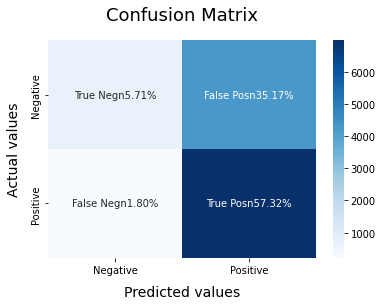

In [112]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred_bayes = BNBmodel.predict(X_test)

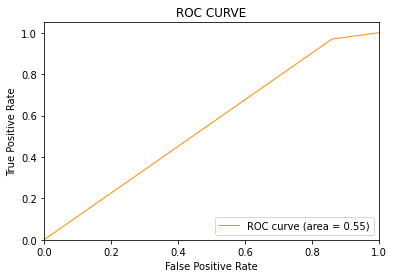

In [113]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_bayes)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#Support-vector machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4975
           1       0.59      1.00      0.74      7195

    accuracy                           0.59     12170
   macro avg       0.30      0.50      0.37     12170
weighted avg       0.35      0.59      0.44     12170



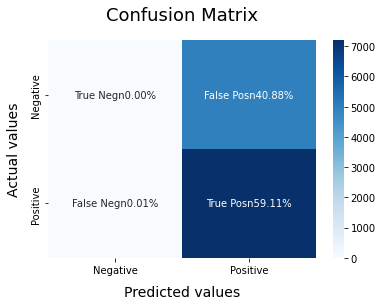

In [115]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred_svm = SVCmodel.predict(X_test)

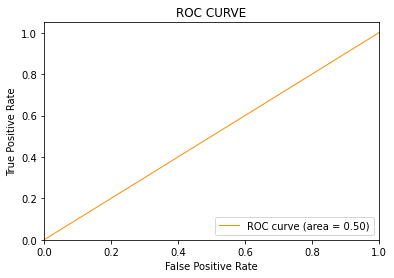

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#Logistic regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4975
           1       0.59      1.00      0.74      7195

    accuracy                           0.59     12170
   macro avg       0.30      0.50      0.37     12170
weighted avg       0.35      0.59      0.44     12170



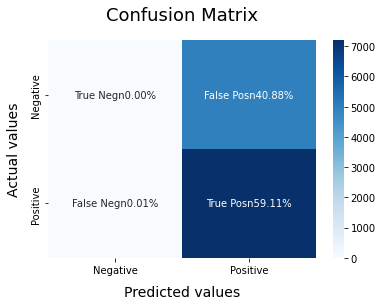

In [117]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(max_iter = 1000)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred_lr = LRmodel.predict(X_test)

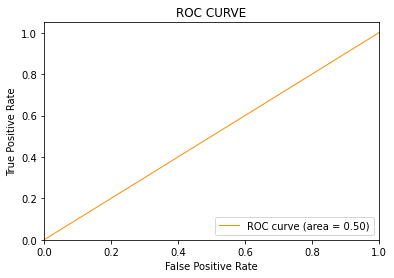

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()